# Central Tendencies, Standard Deviation, Histograms, and Probability 

## Optional activity
Optional activity for additional learning.


# Probability and Descriptive Statistics

1. Initial setup  
1. Loading and reviewing data  
1. Introduction to statistics: coding, qualitative vs. quantitative data.  
2. Mean, Mode, Median, Variance, Standard Deviation  
3. Probability  
4. Normal Distribution (Bell-curve)  
5. Confidence Intervals, Z-Score, T-Scores  
6. Correlation and Causation  

## Purpose
Demonstrate an example of descriptive statistics using housing data


## Initial setup:
1. **Update working directory to point to a directory on your computer with AmesHousing.xls file**
2. The script installs required packages:
 * _readxl_ - reads our data from an Excel spreadsheet
 * _ggplot2_ - plotting
3. R doesn't have a function to calculate mode statistic. We will create **stat\_mode** function to calculate mode, which in turn uses:
 * _tabulate_ - builds a table of the counts at each combination of factor levels
 * _which.max_ - return index of the (first) maximum of a numeric (or logical) vector
 * _match_ - returns a vector of the positions of (first) matches of its first argument in its second
 * Use ?tabulate, ?match, and ?which.max for additional help
4. R's function _mad_ calculated absolute deviation around _median_, but we need deviation around _mean_ - create a function _avgAD_ to calculate

In [1]:
# Initial setup
##### On Windows you can use the following command to map a drive to a local directory
#> subst U: C:/Users/MyDirectory

##### Adjust working directory to match your environment ######
##### This directory should contain the data for this exercise: AmesHousing.xls


In [2]:
# List contents of working directory
dir()

[1] "ames_housing.csv"                                              
 [2] "AmesHousing.xls"                                               
 [3] "AmesHousingDataDictionary.txt"                                 
 [4] "L07-Assignment.ipynb"                                          
 [5] "L07-E1-TwoSidedTest.ipynb"                                     
 [6] "L07-E2-OneSidedTest.ipynb"                                     
 [7] "L07-E3-TestWithFactors.ipynb"                                  
 [8] "L07-E4-DataDistribution.ipynb"                                 
 [9] "Z-L07-E1-TwoSidedTest-Solution.ipynb"                          
[10] "Z-L07-E2-OneSidedTest-Solution.ipynb"                          
[11] "Z-L07-E3-TestWithFactors-Solution.ipynb"                       
[12] "Z-L07-E4-DataDistribution-Solution.ipynb"                      
[13] "Z-L07-O1-CenterDeviationHistogramProbability-Solution.ipynb"   
[14] "Z-L07-O2-DescriptiveStatisticsHypothesisTesting-Solution.ipynb"

In [3]:
# R doesn't have a method to calculate mode statistic, create one
# parameters: 
#    x - vector of values 
#    na_rm = FALSE 
# output: most frequently occuring element in x
stat_mode <- function(x, na_rm = FALSE) {
  if(na_rm){
    x = x[!is.na(x)]
  }
  
  ux <- unique(x)
  return(ux[which.max(tabulate(match(x, ux)))])
}

# R's function mad() calculated absolute deviation around median, but
# we need deviation around mean - create a function to calculate
# parameters: 
#    x - vector of values 
#    na_rm = FALSE 
# output: absolute deviation around mean
avgAD <- function(x, na_rm = FALSE)
{
  if(na_rm){
    x = x[!is.na(x)]
  }
  return(sum(abs(mean(x)-x))/length(x))
}


In [4]:
#Load libraries
library(corrgram)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Loading and Reviewing Data
Recall our discussion about qualitative and quantitative data. R models require us to assign numeric values to character data or “code” character data so we can apply statistical techniques.  R simplifies this procedure with _**as.factor**_ function that will assign different numbers  to each distinct qualitative variable (such as Lot Shape) in our data. Much like in the example in the lesson, addition and subtraction or comparison of qualitative data is not meaningful. For example, Irregular Lot is not bigger than regular lot - they are just different from each other (or belong to different classes).

In [5]:
# Load and review data
#load data
AmesHousing<-readxl::read_excel("AmesHousing.xls")

#Display first 10 rows
head(AmesHousing, 10)
str(AmesHousing)

Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,⋯,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,0526301100,020,RL,141,31770,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,0526350040,020,RH,80,11622,Pave,NA,Reg,Lvl,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,0526351010,020,RL,81,14267,Pave,NA,IR1,Lvl,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,0526353030,020,RL,93,11160,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,0527105010,060,RL,74,13830,Pave,NA,IR1,Lvl,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,0527105030,060,RL,78,9978,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500
7,0527127150,120,RL,41,4920,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,213500
8,0527145080,120,RL,43,5005,Pave,NA,IR1,HLS,⋯,0,NA,NA,NA,0,1,2010,WD,Normal,191500
9,0527146030,120,RL,39,5389,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,3,2010,WD,Normal,236500
10,0527162130,060,RL,60,7500,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,189000


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	2930 obs. of  82 variables:
 $ Order          : num  1 2 3 4 5 6 7 8 9 10 ...
 $ PID            : chr  "0526301100" "0526350040" "0526351010" "0526353030" ...
 $ MS SubClass    : chr  "020" "020" "020" "020" ...
 $ MS Zoning      : chr  "RL" "RH" "RL" "RL" ...
 $ Lot Frontage   : num  141 80 81 93 74 78 41 43 39 60 ...
 $ Lot Area       : num  31770 11622 14267 11160 13830 ...
 $ Street         : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley          : chr  "NA" "NA" "NA" "NA" ...
 $ Lot Shape      : chr  "IR1" "Reg" "IR1" "Reg" ...
 $ Land Contour   : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities      : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ Lot Config     : chr  "Corner" "Inside" "Corner" "Corner" ...
 $ Land Slope     : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood   : chr  "NAmes" "NAmes" "NAmes" "NAmes" ...
 $ Condition 1    : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition 2    : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ Bldg

# Introduction to statistics: coding, qualitative vs. quantitative data.
We see that our numeric data is loaded to num typed fields.

However R needs us to code character data to numbers so we can use statistical algorithms.

R simplifies this procedure with **_as.factor()_** function that will assign different numbers  to each distinct qualitative variable (such as Lot Shape) in our data. Much like in the example in the video lesson addition and subtraction or comparison of qualitative data is not meaningful. For example Irregular Lot is not bigger than regular lot - they are just different from each other or belong to different classes.



In [6]:
# Introduction to statistics, including: 
#    operationalization of concepts (concept to number conversion), 
#    qualitative vs. quantitative data.

#get index of character columns
i <- sapply(AmesHousing, is.character)

#set character columns to factors
AmesHousing[i] <- lapply(AmesHousing[i], as.factor)

#check data
head(AmesHousing, 10)
str(AmesHousing)

Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,⋯,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,0526301100,020,RL,141,31770,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,0526350040,020,RH,80,11622,Pave,NA,Reg,Lvl,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,0526351010,020,RL,81,14267,Pave,NA,IR1,Lvl,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,0526353030,020,RL,93,11160,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,0527105010,060,RL,74,13830,Pave,NA,IR1,Lvl,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,0527105030,060,RL,78,9978,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500
7,0527127150,120,RL,41,4920,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,213500
8,0527145080,120,RL,43,5005,Pave,NA,IR1,HLS,⋯,0,NA,NA,NA,0,1,2010,WD,Normal,191500
9,0527146030,120,RL,39,5389,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,3,2010,WD,Normal,236500
10,0527162130,060,RL,60,7500,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,189000


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	2930 obs. of  82 variables:
 $ Order          : num  1 2 3 4 5 6 7 8 9 10 ...
 $ PID            : Factor w/ 2930 levels "0526301100","0526302030",..: 1 7 8 13 20 21 54 59 62 73 ...
 $ MS SubClass    : Factor w/ 16 levels "020","030","040",..: 1 1 1 1 6 6 12 12 12 6 ...
 $ MS Zoning      : Factor w/ 7 levels "A (agr)","C (all)",..: 6 5 6 6 6 6 6 6 6 6 ...
 $ Lot Frontage   : num  141 80 81 93 74 78 41 43 39 60 ...
 $ Lot Area       : num  31770 11622 14267 11160 13830 ...
 $ Street         : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley          : Factor w/ 3 levels "Grvl","NA","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Lot Shape      : Factor w/ 4 levels "IR1","IR2","IR3",..: 1 4 1 4 1 1 4 1 1 4 ...
 $ Land Contour   : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 2 4 4 ...
 $ Utilities      : Factor w/ 3 levels "AllPub","NoSeWa",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Lot Config     : Factor w/ 5 levels "Corner","CulDSac",..: 1 5 

# Central Tendencies & Measures of Dispersion
We use several mathematical measurements to determine a central point of our distribution (or central tendency), most typically: mean, median, and mode.

$mean = \frac{1}{n}\sum{(x_i)}$, where n=number of samples

$median =  \begin{cases}
               \mbox{when count values is odd: the value on the middle of ordered values}\\
               \mbox{when count values is even: average of two value on the middle of ordered values}\\
            \end{cases}$

$mode = \mbox{most frequent value}$

$StandardDeviation = \frac{1}{n}\sqrt{\sum{(x_i - mean)^2}}$

$MeanAD = \frac{1}{n}\sum{\mid{(x_i - mean)}\mid}$

$MedianAD = \frac{b}{n}\sum{\mid{(x_i - median)}\mid}$, where $b=\frac{1}{.75\_quantile\_of\_underlying\_distribution}$
b=1.4826 for normally distributed data. 

**Notes:** 
1. _central tendency functions have a parameter **na.rm** which removes NAs from calculations_, else a function will fail when it encounters NA
2. [Leys et al. 2012](https://www.academia.edu/5324493/Detecting_outliers_Do_not_use_standard_deviation_around_the_mean_use_absolute_deviation_around_the_median) advocating for using Median Absolute Deviation for outlier detection (more in the next lesson).

[1] "mean(SalePrice) = 180796.060068259"
[1] "median(SalePrice) = 160000"
[1] "mode(SalePrice) = 135000"
[1] "mode(Lot Shape) = Reg"
[1] "standard deviation (SalePrice) = 79886.692356665"
[1] "median absolute deviation (SalePrice) = 54856.2"
[1] "median absolute deviation (SalePrice, b=1) = 37000"
[1] "mean absolute deviation (SalePrice) = 58276.3157292455"


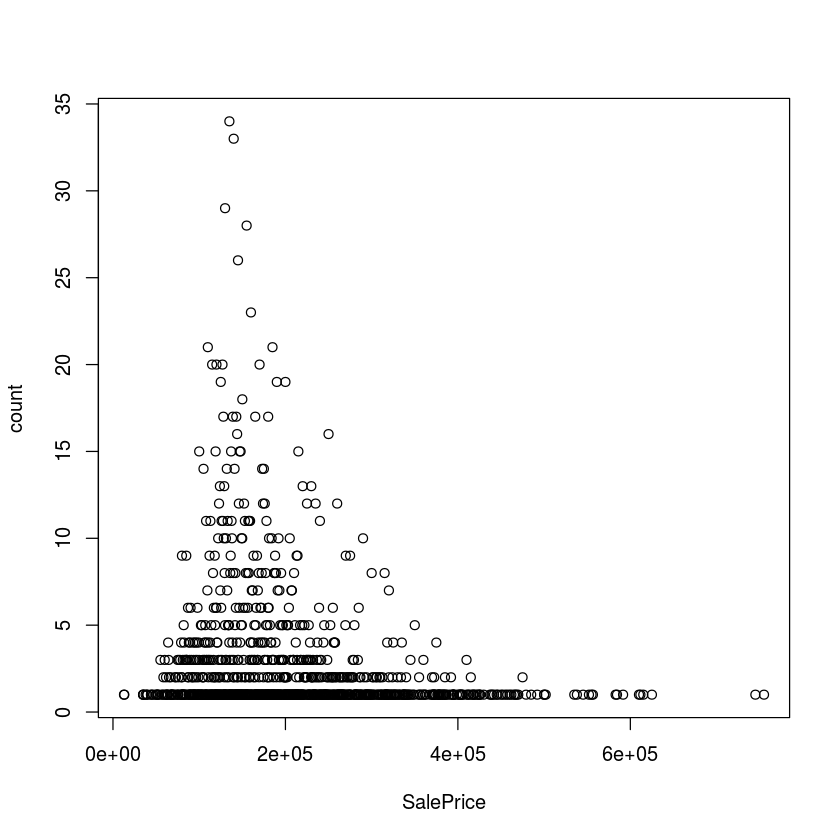

In [7]:
# Central tendencies & measure of dispersion

#group AmesHousing$SalePrice by price and calculate count in each group
grouped_pricing <- AmesHousing %>%
    group_by(SalePrice) %>%
    summarise(count=n())

# Visualize grouped pricing
plot(grouped_pricing)

#calculate and output central tendencies
print(paste("mean(SalePrice) =",mean(AmesHousing$SalePrice)))
print(paste("median(SalePrice) =",median(AmesHousing$SalePrice)))
print(paste("mode(SalePrice) =",stat_mode(AmesHousing$SalePrice)))

#mode is more interesting for factors. Note that most of the lots have regular = 'Reg'shape.
print(paste("mode(Lot Shape) =",stat_mode(AmesHousing$'Lot Shape')))
#median(AmesHousing$'Lot Shape') - wouldn't work - Error: need numeric data

#standard deviation
print(paste("standard deviation (SalePrice) =", S <- sd(AmesHousing$SalePrice)))

#MAD - median absolute deviation
print(paste("median absolute deviation (SalePrice) =", MedianAD <- mad(AmesHousing$SalePrice))) #with scaling
print(paste("median absolute deviation (SalePrice, b=1) =",MedianAD <- mad(AmesHousing$SalePrice, constant=1))) #without scaling

#MAD - mean absolute deviation
print(paste("mean absolute deviation (SalePrice) =",meanAD <- avgAD(AmesHousing$SalePrice)))


# Viewing statistics for our data

In [8]:
? hist

In [9]:
# Viewing statistics for our data
# get histogram information
print(">>> hist() function buckets")
print(histinfo <- hist(AmesHousing$SalePrice, plot = FALSE))

#scale density to frequency / count
scaleDensity <- max(histinfo$counts)/max(histinfo$density)

[1] ">>> hist() function buckets"
$breaks
 [1]      0  50000 100000 150000 200000 250000 300000 350000 400000 450000
[11] 500000 550000 600000 650000 700000 750000 800000

$counts
 [1]   12  240 1019  802  412  215  111   55   32   15    5    6    4    0    1
[16]    1

$density
 [1] 8.191126e-08 1.638225e-06 6.955631e-06 5.474403e-06 2.812287e-06
 [6] 1.467577e-06 7.576792e-07 3.754266e-07 2.184300e-07 1.023891e-07
[11] 3.412969e-08 4.095563e-08 2.730375e-08 0.000000e+00 6.825939e-09
[16] 6.825939e-09

$mids
 [1]  25000  75000 125000 175000 225000 275000 325000 375000 425000 475000
[11] 525000 575000 625000 675000 725000 775000

$xname
[1] "AmesHousing$SalePrice"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


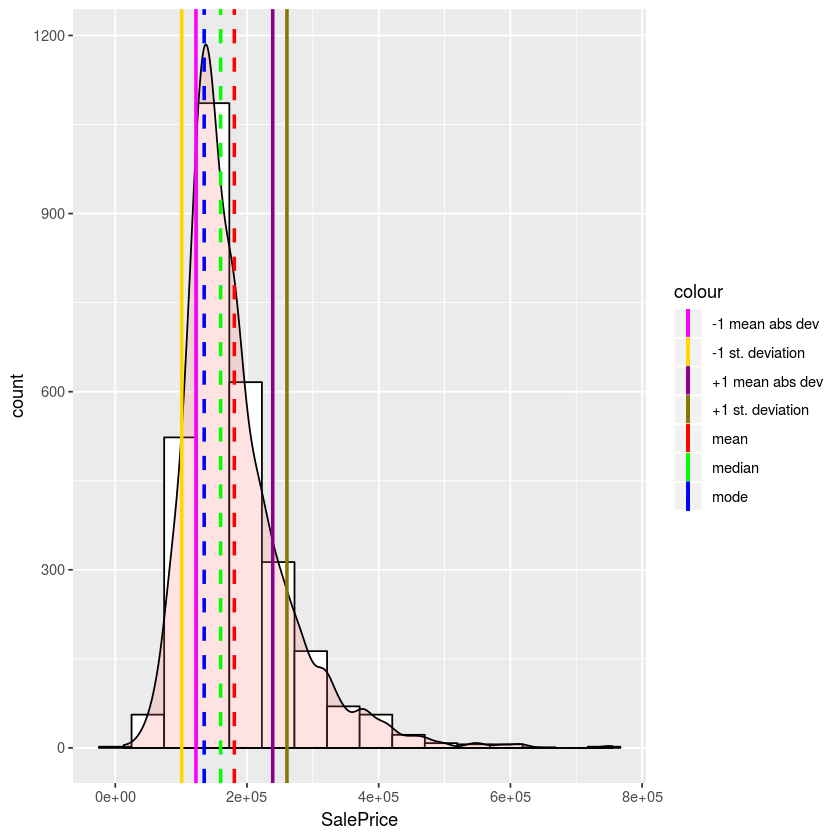

In [10]:
# Create a ggplot object to draw a Histogram of housing sales price overlaid with density curve.
# Assigning ggplot() to an object will allow us to examine internal details.
X <- ggplot(AmesHousing, aes(x=SalePrice), environment = environment()) + 
  geom_histogram(aes(y=..count..),      # Density on y-axis
                 bins=length(histinfo$counts),
                 color="black", fill="white") +  
  eval(substitute(geom_density(aes(y = ..density..*scaleDensity), alpha=.2, fill="#FF7777"), env = list(scaleDensity=scaleDensity))) + # Overlay with density plot
  geom_vline(aes(xintercept=mean(SalePrice), color="mean"), linetype="dashed", size=1) + #vertical line for mean
  geom_vline(aes(xintercept=median(SalePrice), color="median"), linetype="dashed", size=1) + #vertical line for mean
  geom_vline(aes(xintercept=stat_mode(SalePrice), color="mode"), linetype="dashed", size=1) + #vertical line for mode
  geom_vline(aes(xintercept=mean(SalePrice)-S, color="-1 st. deviation"), linetype="solid", size=1) + #vertical line for - 1 st. deviation
  geom_vline(aes(xintercept=mean(SalePrice)+S, color="+1 st. deviation"), linetype="solid", size=1) + #vertical line for + 1 st. deviation
  geom_vline(aes(xintercept=mean(SalePrice)-meanAD, color="-1 mean abs dev"), linetype="solid", size=1) + #vertical line for - 1 st. deviation
  geom_vline(aes(xintercept=mean(SalePrice)+meanAD, color="+1 mean abs dev"), linetype="solid", size=1) + #vertical line for + 1 st. deviation
  scale_color_manual(values = c("mean"="red", "median"="green", "mode"="blue", 
                                "-1 st. deviation"="gold", "+1 st. deviation"="gold4",
                                "-1 mean abs dev"="magenta", "+1 mean abs dev"="magenta4"
  ))

#plot histogram
print(X)

In [11]:
#examine ggplot() histogram details, notice while we used the number of buckets from hist()
#ggplot has it's own bucketing algorithm
print(">>> ggplot() function buckets")
ggplot_build(X)$data[[1]]

[1] ">>> ggplot() function buckets"


y,count,x,xmin,xmax,density,ncount,ndensity,PANEL,group,ymin,ymax,colour,fill,size,linetype,alpha
2,2,0.00,-24740.37,24740.37,1.379514e-08,0.0018416206,0.0018416206,1,-1,0,2,black,white,0.5,1,NA
56,56,49480.73,24740.37,74221.10,3.862640e-07,0.0515653775,0.0515653775,1,-1,0,56,black,white,0.5,1,NA
523,523,98961.47,74221.10,123701.83,3.607430e-06,0.4815837937,0.4815837937,1,-1,0,523,black,white,0.5,1,NA
1086,1086,148442.20,123701.83,173182.57,7.490763e-06,1.0000000000,1.0000000000,1,-1,0,1086,black,white,0.5,1,NA
616,616,197922.93,173182.57,222663.30,4.248904e-06,0.5672191529,0.5672191529,1,-1,0,616,black,white,0.5,1,NA
313,313,247403.67,222663.30,272144.03,2.158940e-06,0.2882136280,0.2882136280,1,-1,0,313,black,white,0.5,1,NA
163,163,296884.40,272144.03,321624.77,1.124304e-06,0.1500920810,0.1500920810,1,-1,0,163,black,white,0.5,1,NA
70,70,346365.13,321624.77,371105.50,4.828301e-07,0.0644567219,0.0644567219,1,-1,0,70,black,white,0.5,1,NA
56,56,395845.87,371105.50,420586.23,3.862640e-07,0.0515653775,0.0515653775,1,-1,0,56,black,white,0.5,1,NA
22,22,445326.60,420586.23,470066.97,1.517466e-07,0.0202578269,0.0202578269,1,-1,0,22,black,white,0.5,1,NA


# Probability

Probability is the measure of the likelihood that an event will occur on a scale from 0 to 1. Or if put in percentage terms 0% - 100%, where 0 indicates impossibility and 1 indicates certainty. 

A simple example of probability is the tossing of a fair (unbiased) coin. We have 50% probability of heads and 50% probability of tail.

Notice that on a small number of tosses we are substantially different from 50/50 heads/tails proportion. In the small sample - we may see more than twice as many tails as we see heads. Try a quarter coin toss at home and compare you results.

In [12]:
? sample

In [13]:
? table

In [14]:
# coin flip experiment
set.seed(0)

coinToss <- sample(c("heads","tails"), 10, replace = TRUE)
table(coinToss)

coinToss <- sample(c("heads","tails"), 100, replace = TRUE)
table(coinToss)

coinToss <- sample(c("heads","tails"), 1000, replace = TRUE)
table(coinToss)



coinToss
heads tails 
    3     7 

coinToss
heads tails 
   54    46 

coinToss
heads tails 
  518   482 

# Normal Distribution (Bell-curve), Central Limit Theorem
R has several functions that help us to explore normal distribution:
* **dnorm**(x, mean = 0, sd = 1, log = FALSE) **probability density of normal distribution** or relative likelihood for a random variable **x** to have a given value 
* **pnorm**(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE) **cumulative distribution** or an area under the cuve of the function _dnrom()_ 
* **qnorm**(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE) **quantile of normal distribution**, 
 * **qnorm()**  is inverse ("reverses") of _pnorm()_
 * **p** is the cummulative probability parameter 
 * returns a value z* corresponding to p, where 
   * **P(x > z*) < (1-p)** for **qnorm(p, lower.tail = TRUE)**
   * and **P(x < z*) < p** for **qnorm(p, lower.tail = FALSE)**
   * i.e. probability of observing random normally distributed variable x outside of [-z\*, z\*] interval is (1-p)*2 
   * example: we use 97.5% quantile for 95% confidence level because 97.5% gives us 2.5% probability on each tail of the distribution 2.5% + 2.5% = 5% total that x will be outside of [-z\*, z\*]
* **rnorm**(n, mean = 0, sd = 1) **random numbers from normal distribution** 


In [15]:
? xlim

In [16]:
? stat_function

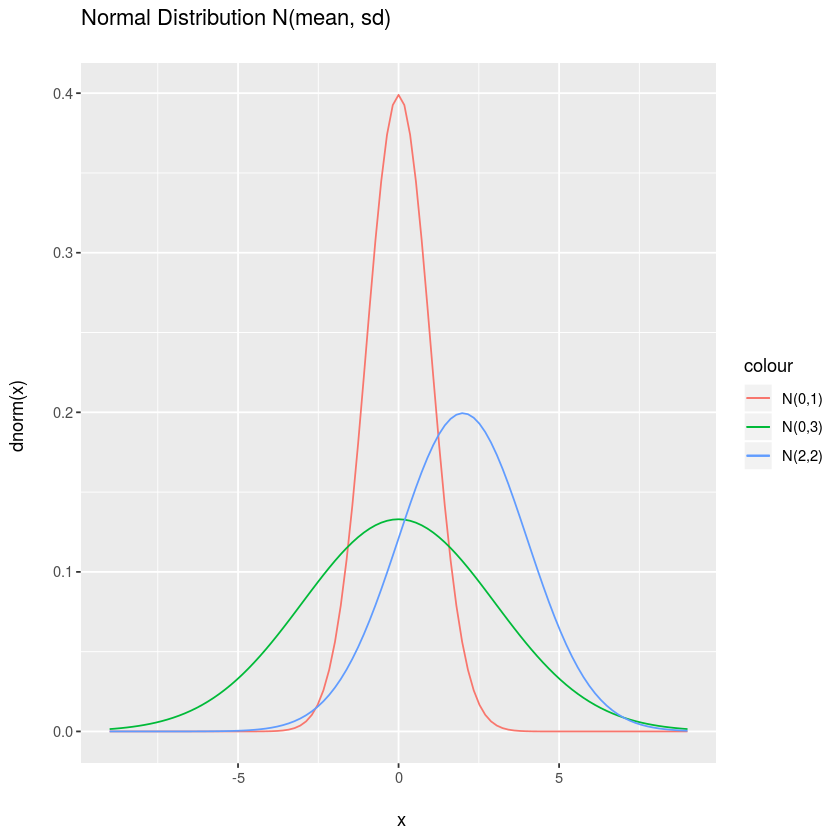

In [17]:
# Draw various normal distribution graphs
xRange = 9 #x=[-xRange, + xRange]

ggplot(data.frame(x = c(-xRange , xRange)), aes(x = x)) + 
  xlim(c(-xRange , xRange)) + 
  stat_function(fun = dnorm, args = list(mean = 0, sd = 1), aes(colour = "N(0,1)")) + 
  stat_function(fun = dnorm, args = list(mean = 0, sd = 3), aes(colour = "N(0,3)")) + 
  stat_function(fun = dnorm, args = list(mean = 2, sd = 2), aes(colour = "N(2,2)")) +
  labs(x = "\n x", y = "dnorm(x) \n", title = "Normal Distribution N(mean, sd) \n ")

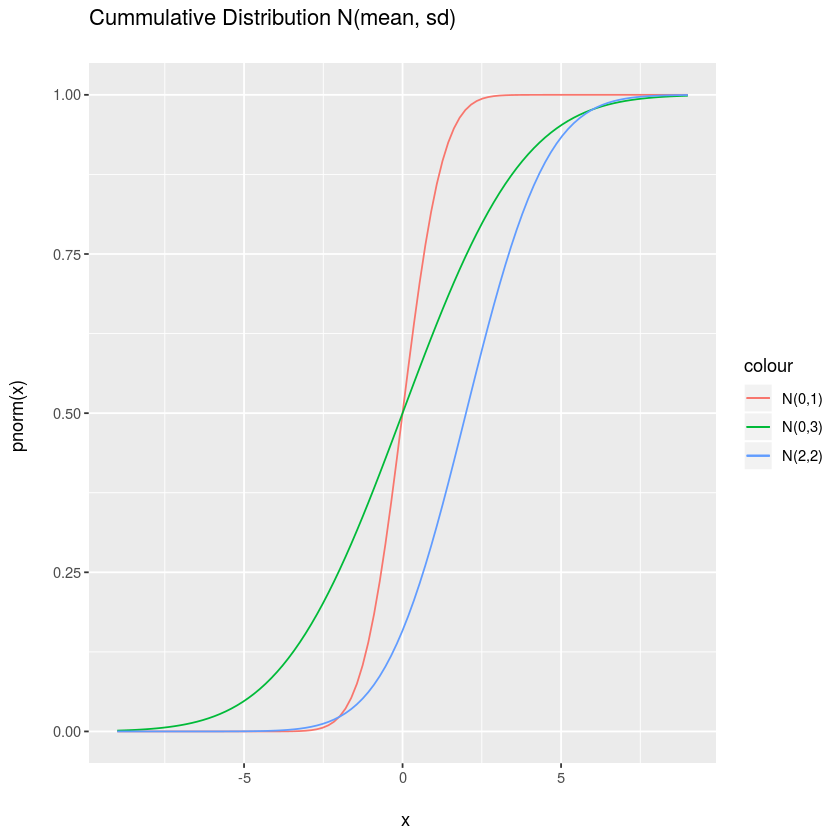

In [18]:
#draw various cummulative probability graphs
ggplot(data.frame(x = c(-xRange , xRange)), aes(x = x)) + 
  xlim(c(-xRange , xRange)) + 
  stat_function(fun = pnorm, args = list(mean = 0, sd = 1), aes(colour = "N(0,1)")) + 
  stat_function(fun = pnorm, args = list(mean = 0, sd = 3), aes(colour = "N(0,3)")) + 
  stat_function(fun = pnorm, args = list(mean = 2, sd = 2), aes(colour = "N(2,2)")) +
  labs(x = "\n x", y = "pnorm(x) \n", title = "Cummulative Distribution N(mean, sd) \n ")


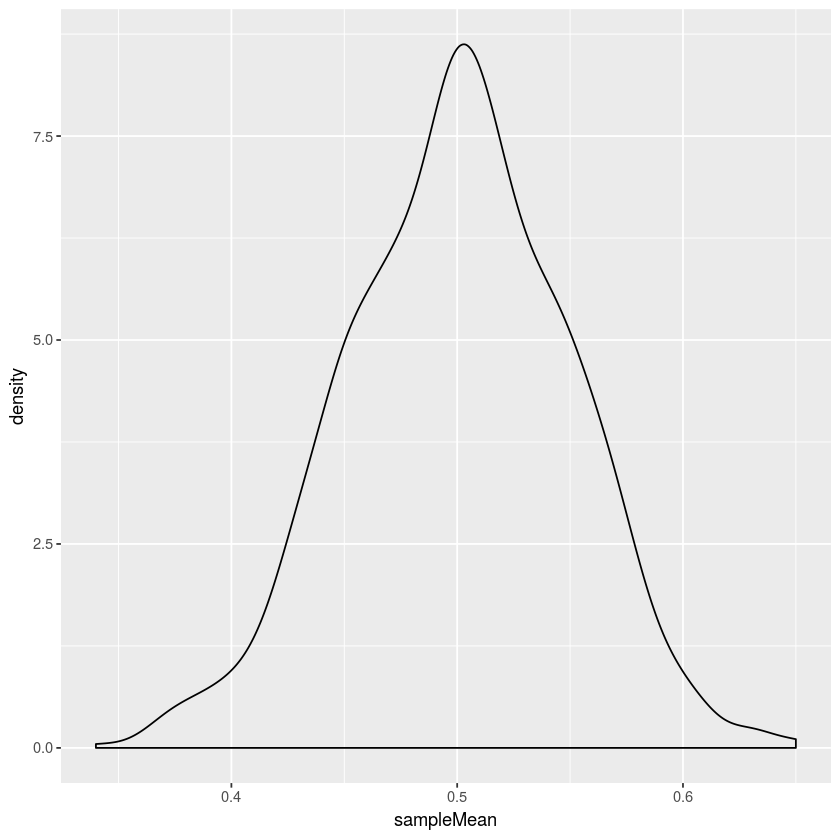

In [19]:
#Central Limit Theorem
#distribution of sample means will be approximately normal
set.seed(0)
sampleMean <- c()
for (i in 1:1000)
{
  randomSample <- sample(c(0,1), 100, replace=TRUE)
  sampleMean[i] <- mean(randomSample)
}

#plot density function of our coin experiement
#notice that it's approximately normal
ggplot(data.frame(sampleMean), aes(x = sampleMean)) + 
           geom_density(aes(y=..density..)) 

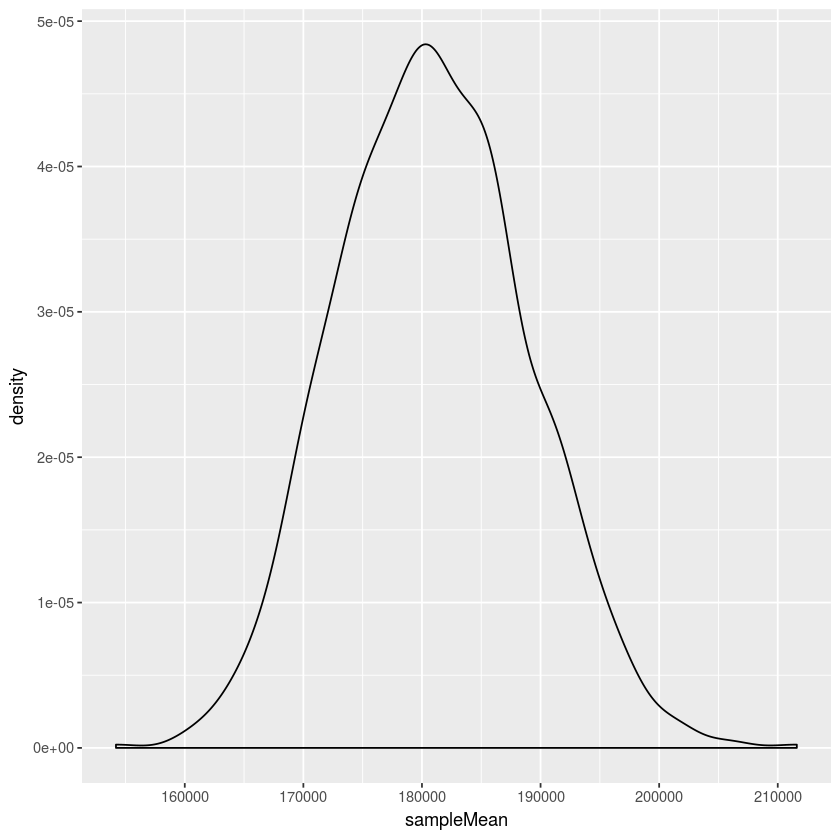

In [20]:
#same "normality" is true for the SalesPrice in the housing data
#even though the underlying distribution is skewed
  set.seed(0)
  sampleMean <- c()
  for (i in 1:1000)
  {
    randomSample <- sample(AmesHousing$SalePrice, 100, replace=TRUE)
    sampleMean[i] <- mean(randomSample)
  }
  
  ggplot(data.frame(sampleMean), aes(x = sampleMean)) + 
    geom_density(aes(y=..density..))



# Confidence Intervals

Now let's see why 95% of normally distributed samples are between +- 2 standard deviation.  
Note that qnorm(0.975)=1.95996 ~ 2*sd  

What if the population mean is unknown, like in our example of housing prices, and we want to estimate it with a range of possible values?

We can estimate using formula:
$\mu=\bar{x}\pm[MOE]$, where
* MOE = margin of error = $\frac{z^*\sigma}{\sqrt{n}}$
* $z^*=\pm qnorm(CL)$ 
* CL = confidence level

Interval $[\bar{x}-MOE, \bar{x}+MOE]$ is exact when the population distribution is normal, and approximately correct when n is large in in other cases

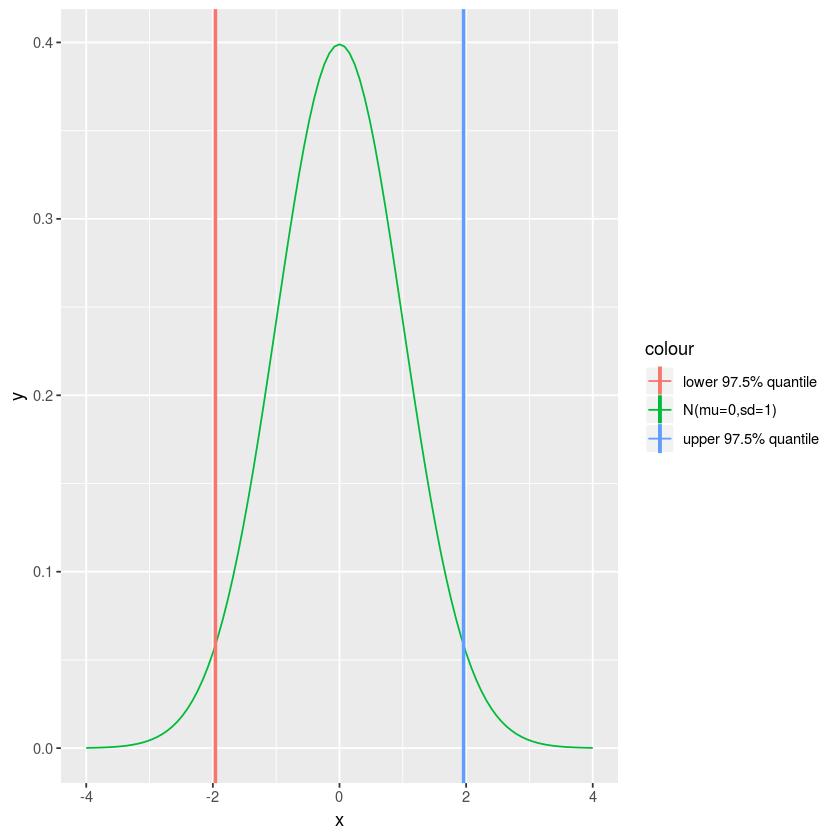

In [21]:
# Confidence Intervals, Z-Score, T-Scores

#95% of normally distributed samples with standard deviation of 1 are in the interval [-1.95996,1.95996]
  mu <- 0
  sd <- 1
  xRange = 4

  ggplot(data.frame(x = c(-xRange , xRange)), aes(x = x)) + 
    xlim(c(-xRange , xRange)) + 
    stat_function(fun = dnorm, args = list(mean = mu, sd = sd), aes(colour = "N(mu=0,sd=1)")) +
    geom_vline(aes(xintercept=qnorm(0.975), color="upper 97.5% quantile"), linetype="solid", size=1) +
    geom_vline(aes(xintercept=qnorm(0.975, lower.tail = FALSE), color="lower 97.5% quantile"), linetype="solid", size=1) 

Warning message:
“Removed 467 rows containing non-finite values (stat_density).”

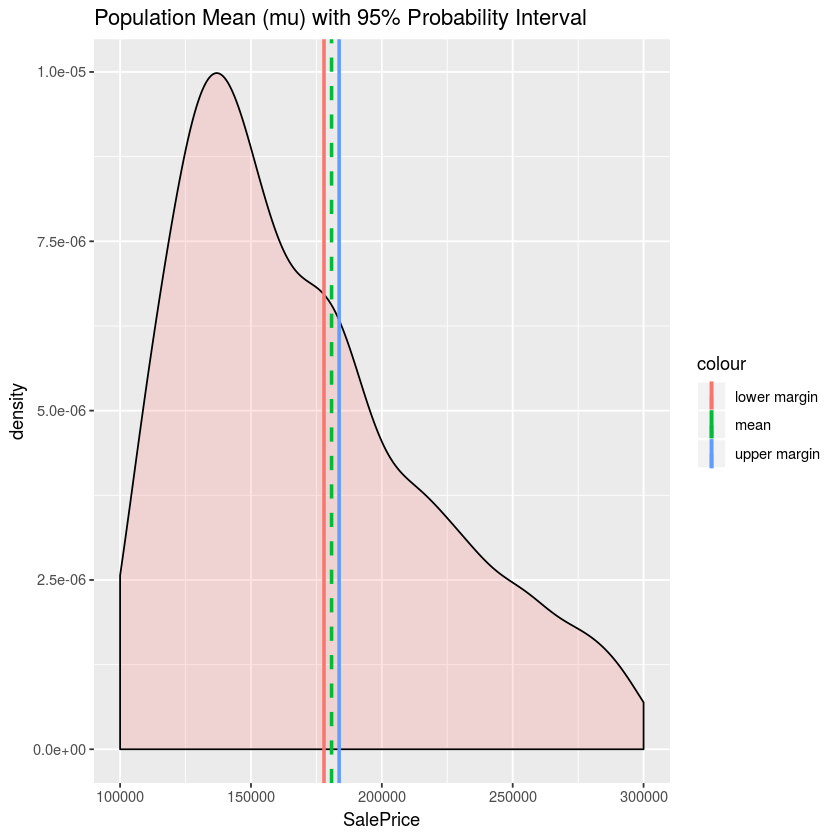

In [22]:
#95% confidence interval for average house price
set.seed(5)

#for somlicity assuming the entire housing dataset is complete population 
mu <- mean(AmesHousing$SalePrice)
sd <- sd(AmesHousing$SalePrice)

#plot population distribution and 95% probability interval for Population Mean (mu)
ggplot(AmesHousing, aes(x=SalePrice)) +
  scale_x_continuous(limits=c(1E5,3E5)) +
  geom_density(aes(y = ..density..), alpha=.2, fill="#FF7777") + # Overlay with density plot
  geom_vline(aes(xintercept=mu, color="mean"), linetype="dashed", size=1) +
  geom_vline(aes(xintercept=mu-qnorm(0.975)*sd/sqrt(length(SalePrice)), color="lower margin"), size=1) +
  geom_vline(aes(xintercept=mu+qnorm(0.975)*sd/sqrt(length(SalePrice)), color="upper margin"), size=1) +
  labs(title = "Population Mean (mu) with 95% Probability Interval")

Warning message:
“Removed 6 rows containing non-finite values (stat_density).”

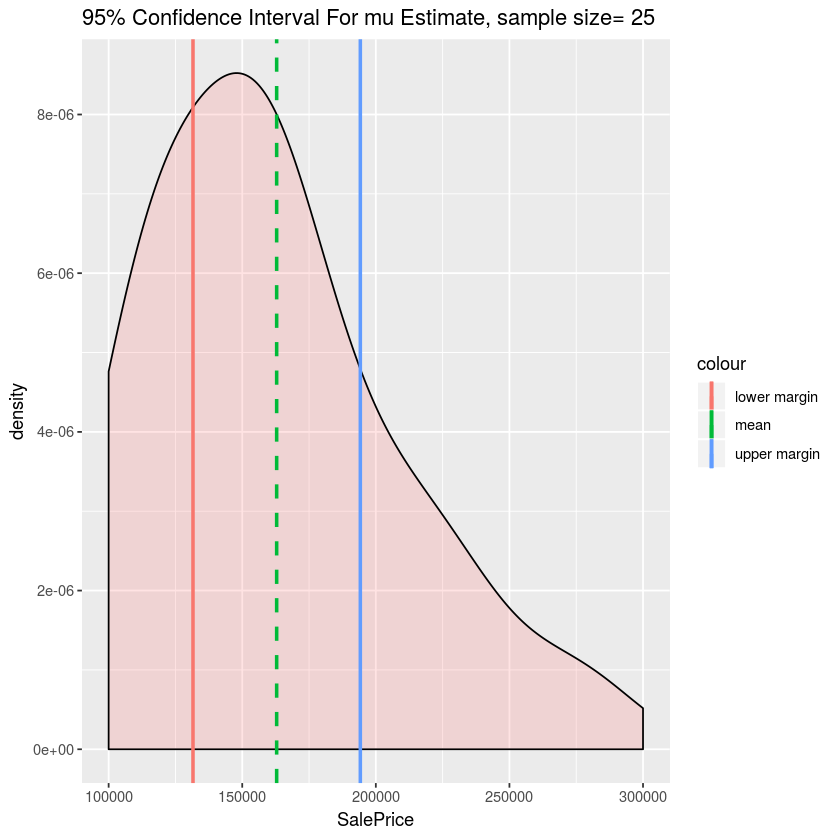

In [23]:
#mall sample population distribution and 95% Confidence Interval for the estimate of Population Mean (mu)
#note that interval is quite "wide"
sample_size <- 25
sample <- AmesHousing[sample(1:nrow(AmesHousing), sample_size),]

ggplot(sample, aes(x=SalePrice)) +
  scale_x_continuous(limits=c(1E5,3E5)) +
  geom_density(aes(y = ..density..), alpha=.2, fill="#FF7777") + # Overlay with density plot
  geom_vline(aes(xintercept=mean(SalePrice), color="mean"), linetype="dashed", size=1) +
  geom_vline(aes(xintercept=mean(SalePrice)-qnorm(0.975)*sd/sqrt(sample_size), color="lower margin"), size=1) +
  geom_vline(aes(xintercept=mean(SalePrice)+qnorm(0.975)*sd/sqrt(sample_size), color="upper margin"), size=1) +
  labs(title = paste("95% Confidence Interval For mu Estimate, sample size=",sample_size))

Warning message:
“Removed 43 rows containing non-finite values (stat_density).”

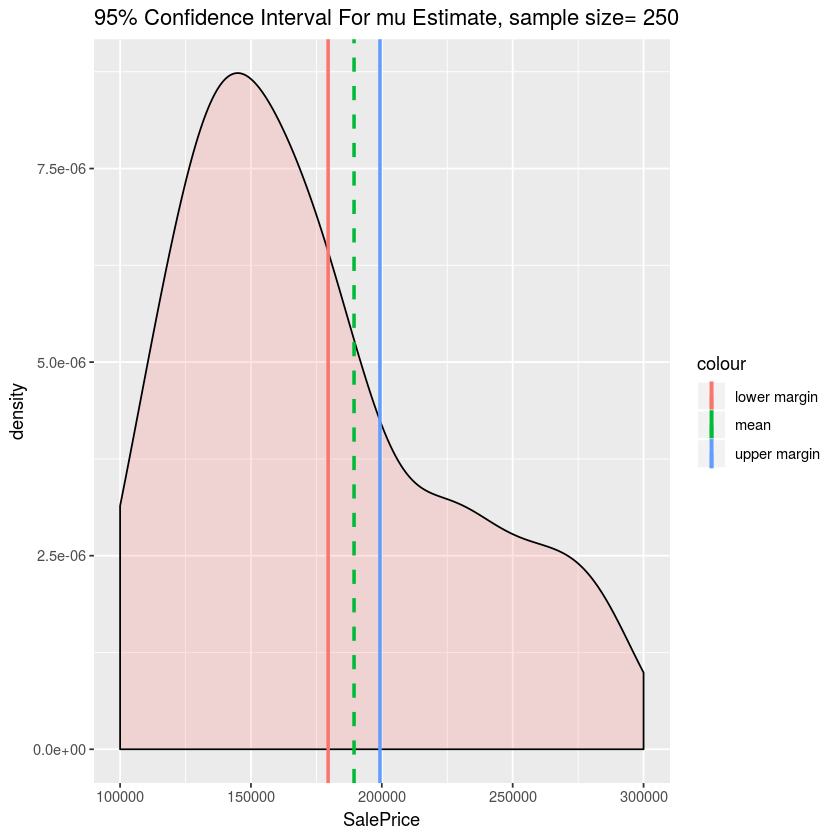

In [24]:
#larger sample population distribution and 95% Confidence Interval for the estimate of Population Mean (mu)
#note that interval is "narrow"
#note that both confidence intervals include the actual population mean
sample_size <- 250
sample <- AmesHousing[sample(1:nrow(AmesHousing), sample_size),]

ggplot(sample, aes(x=SalePrice)) +
  scale_x_continuous(limits=c(1E5,3E5)) +
  geom_density(aes(y = ..density..), alpha=.2, fill="#FF7777") + # Overlay with density plot
  geom_vline(aes(xintercept=mean(SalePrice), color="mean"), linetype="dashed", size=1) +
  geom_vline(aes(xintercept=mean(SalePrice)-qnorm(0.975)*sd/sqrt(sample_size), color="lower margin"), size=1) +
  geom_vline(aes(xintercept=mean(SalePrice)+qnorm(0.975)*sd/sqrt(sample_size), color="upper margin"), size=1) +
  labs(title = paste("95% Confidence Interval For mu Estimate, sample size=",sample_size))


# Z-Score, T-Scores

$Z=\frac{x-\mu}{\sigma}$

In [25]:
?cbind

In [26]:
?scale

In [27]:
#note how scaling brings data to the same order of magnitude
head(cbind(AmesHousing$SalePrice,  AmesHousing$`Gr Liv Area`), 10)
head(cbind(scale(AmesHousing$SalePrice),  scale(AmesHousing$`Gr Liv Area`)), 10)


215000,1656
105000,896
172000,1329
244000,2110
189900,1629
195500,1604
213500,1338
191500,1280
236500,1616
189000,1804


0.4281557,0.3092123
-0.9487946,-1.1942232
-0.1101067,-0.3376606
0.7911698,1.2073172
0.1139607,0.2558008
0.1840599,0.2063456
0.4093791,-0.3198568
0.1339890,-0.4345926
0.6972868,0.2300841
0.1026947,0.6019866


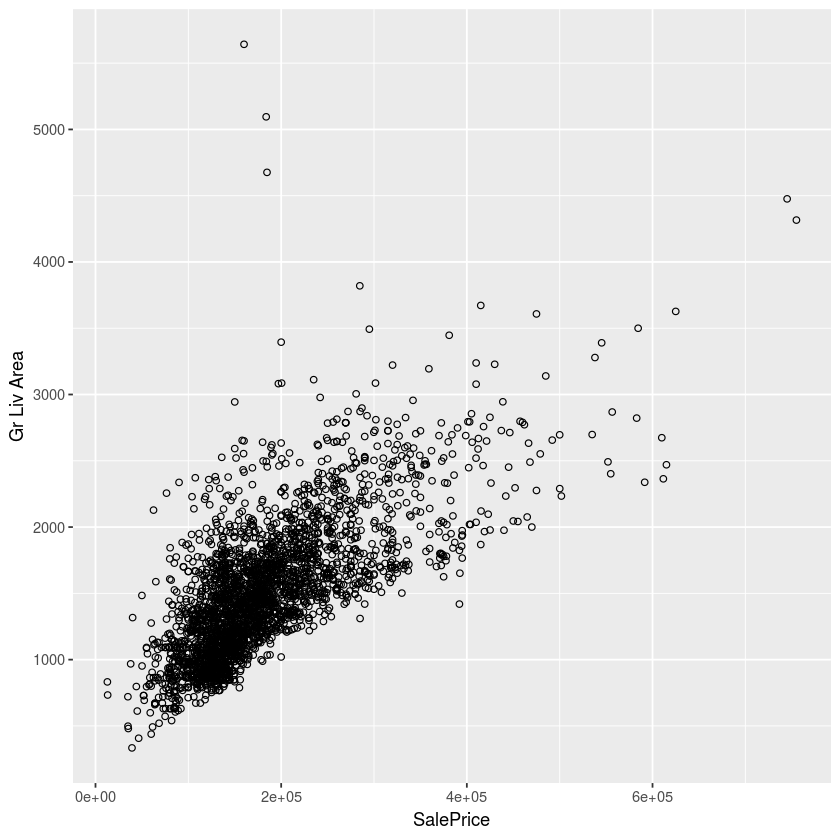

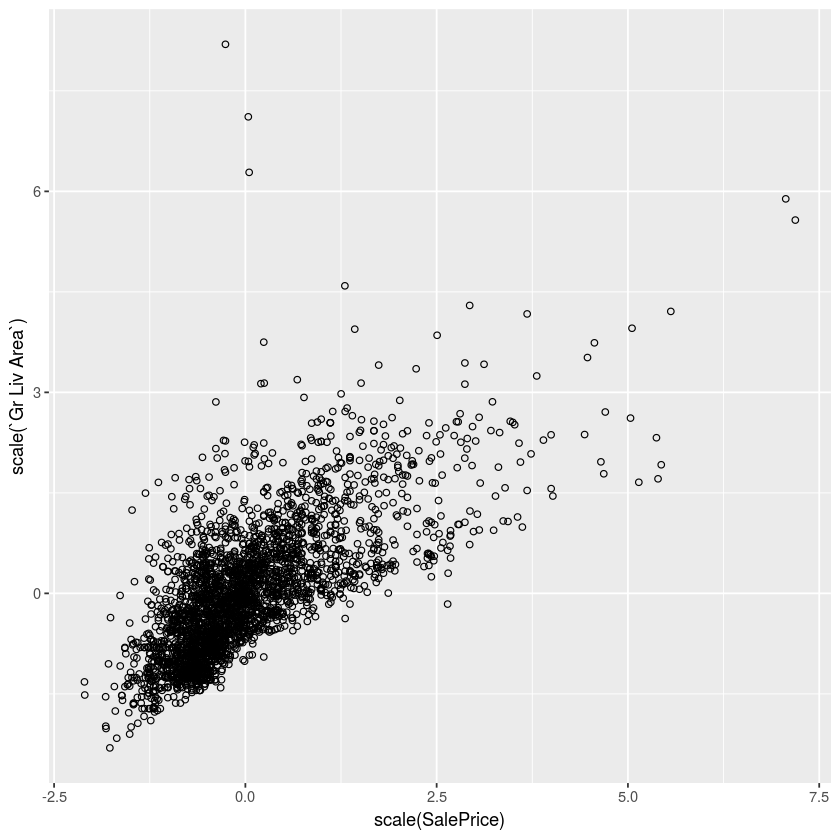

In [28]:
#note that scaling maintains the relationship between data and "centers" data around 0
ggplot(AmesHousing,aes(x = SalePrice, y=`Gr Liv Area`)) +
    geom_point(shape=1) 
  
ggplot(AmesHousing,aes(x = scale(SalePrice), y=scale(`Gr Liv Area`))) +
    geom_point(shape=1) 

# Correlation

Correlation – an extent of linear relationship Expressed by correlation coefficient r: 
	r  [-1, 1]
	0 – no relationship
	-1 or 1 – perfect correlation

R has a number of functions to help working with correlation  
**cor()** - returns correlation matrix  

In [29]:
? cor

In [30]:
# calculate correlation matrix on numeric attributes
corMatrix <- cor(na.omit(AmesHousing[, sapply(AmesHousing, is.numeric)]))

In [31]:
# display the correlation between 2 attributes in the matrix and the correlation coefficent
(corMatrix <- cor(na.omit(AmesHousing[, c("SalePrice", "Gr Liv Area")])))
corMatrix[c("SalePrice"),c("Gr Liv Area")]

,SalePrice,Gr Liv Area
SalePrice,1.0000000,0.7067799
Gr Liv Area,0.7067799,1.0000000


[1] 0.7067799